In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps=PorterStemmer()
from sklearn.model_selection import train_test_split

In [13]:
df=pd.read_csv('C:\\Users\\Gaura\\OneDrive\\Desktop\\dataset\\spam (1).csv',sep=',')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


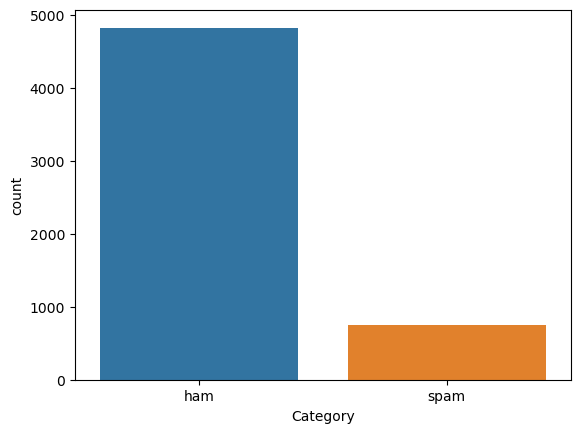

In [17]:
sns.countplot(x='Category',data=df)
plt.show()

## Tokenization

In [ ]:
# we dont need Tokenization because the sentences are saperate,and they are already classified

In [41]:
corpus=[]
for i in range(len(df)):
    rp=re.sub('[^a-zA-Z]'," ",df['Message'][i])
    rp=rp.lower()
    rp=rp.split()
    rp=[ps.stem(word) for word in rp if not word  in set(stopwords.words('english'))]
    rp=" ".join(rp)
    corpus.append(rp)
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

# Vectorization

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(corpus).toarray()

In [28]:
y=pd.get_dummies(df['Category'],drop_first=True)

In [ ]:
#Now our data is ready for the algorithm 
# x= in our x variable that is the input variable where the data is cleaned(all the stop words,puntuations
#and sentences are stemmed)

# spliting the data 

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

# Modeling

In [34]:
# Naive Basie THeorem

In [37]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train,y_train)

C:\Users\Gaura\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

# Prediction

In [38]:
t_pred_train=model.predict(x_train)
t_pred_test=model.predict(x_test)

# Evaluation

In [40]:
from sklearn.metrics import accuracy_score
print('training accuracy:',accuracy_score(y_train,t_pred_train))
print('testing accuracy:',accuracy_score(y_test,t_pred_test))

training accuracy: 0.9907692307692307
testing accuracy: 0.9742822966507177


In [43]:
from joblib import dump

In [44]:
dump(model,'spam.joblib')

['spam.joblib']

In [45]:
from joblib import load

In [46]:
load_model=load('spam.joblib')

In [47]:
load_model.predict([['Nah I dont think he goes to usf, he lives around here though']])

C:\Users\Gaura\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


ValueError: Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'